In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import decomposition
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import plotly.offline as pyo
import plotly.graph_objs as go
import dash_core_components as dcc
import dash_html_components as html
import seaborn as sns; sns.set(font_scale=1.2)
import plotly.graph_objs as go
import dash
import dash_bootstrap_components as dbc
import plotly.express as px
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from dash.dependencies import Input, Output
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn import linear_model, datasets
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster,set_link_color_palette
%matplotlib inline

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



# I - Lecture et compréhension de données 

### 1 - Lecture de données

In [2]:
data = pd.read_excel("DataFiles/default of credit card clients.xls")

In [3]:
data.isna().values.any()

False

In [4]:
data.shape

(30001, 25)

In [5]:
data.head();

In [6]:
#The first row is equivalent to the header and the last column is the target column
data1 = data.iloc[1:,:]
data1.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
data1["X6"].unique()

array([2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6], dtype=object)

### 2 - Comprehension de données

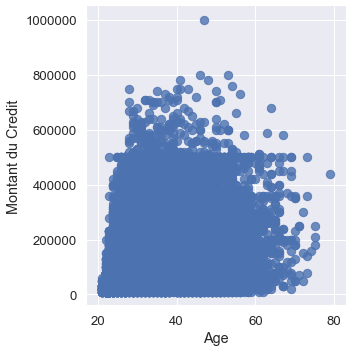

In [8]:
ax = sns.lmplot("X5","X1",data=data1,fit_reg=False,scatter_kws={"s":70})
ax.set(xlabel="Age",ylabel="Montant du Credit")
plt.show()

on remarque que les personnes ayant l'âge entre 20 et 30 ans ont plus souvent des credit inferieur à 500000

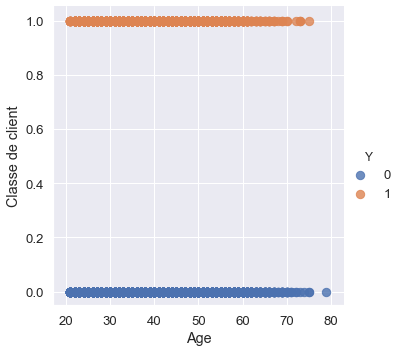

In [9]:
ax = sns.lmplot("X5","Y",data=data1,fit_reg=False,scatter_kws={"s":70},hue="Y")
ax.set(xlabel="Age",ylabel="Classe de client")
plt.show()

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning:

The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.



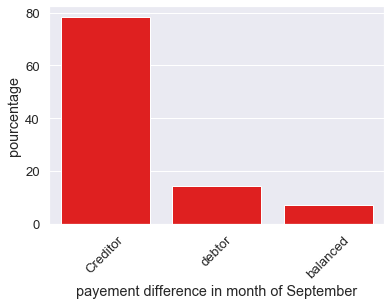

In [10]:
bill_amount= data1.iloc[:,12]
pay_amount= data1.iloc[:,18]
dif=bill_amount- pay_amount
((data1.mean() - data1.median()) / data1.mean()).abs()
dif.sort_values()
pos =( dif.get_values() > 0 ).sum()
neg = ( dif.get_values() < 0 ).sum()
null =( dif.get_values() == 0 ).sum()
percent_pos = (pos*100) / dif.count()
percent_neg = (neg*100) / dif.count()
percent_null = (null*100) / dif.count()
fake = pd.DataFrame({'cat': ['Creditor', 'debtor', 'balanced'], 'val': [percent_pos, percent_neg, percent_null]})
ax =sns.barplot(x='cat',y="val", data = fake,color = 'red')
ax.set(xlabel="payement difference in month of September",ylabel ='pourcentage')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

Pour le mois de Septembre on remarque que la plupart des clients (78.44%) sont créditeur puis on trouve des faibles valeurs pour les clients débiteurs (16.31% ) et équilibré(6%)

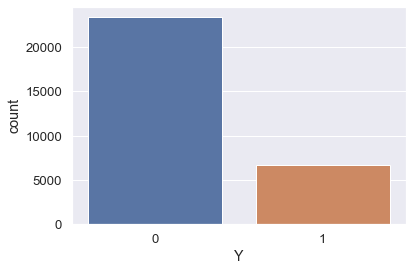

In [11]:
sns.countplot(data1['Y'],label="Count")
plt.show()

On remarque que le nombre de clients qui ne vont pas payer le mois prochain (25000) est trés elevé par rapports aux clients qui vont payer (10000).

# II - centrage reduction de données

Dans la partie qui suit on va faire le centrage réduction de données avec trois differents Scalers : 
- Standard Scaler : (X - µ) / sigma
- Robust Scaler : (X - mediane)/IQR (interquantile range)
- MinMax Scaler :( X - min) / (max - min)

In [12]:
dataKmeans = data.iloc[1:,1:24]

In [13]:
ss = StandardScaler()
rs = RobustScaler()
mms = MinMaxScaler()

In [14]:
dataKmeansSs = ss.fit_transform(dataKmeans)
dataKmeansRs = rs.fit_transform(dataKmeans)
dataKmeansMms = mms.fit_transform(dataKmeans)

# III - Application de K-means

### 1 - Determiner le nombre de cluster par la methode d' ELBOW 

#### A - Donnée non centré reduites 

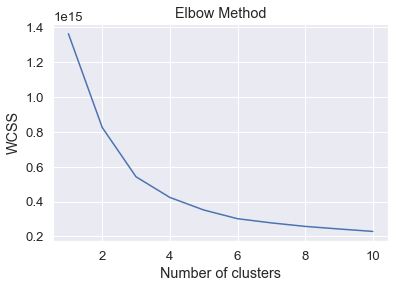

In [15]:
y=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(dataKmeans)
    y.append(kmeans.inertia_)
plt.plot(range(1, 11), y)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


on remarque que le nombre de cluster convenable est 2 (la cassure et au niveau 2)

#### B - Donnée centre réduites avec StandardScaler

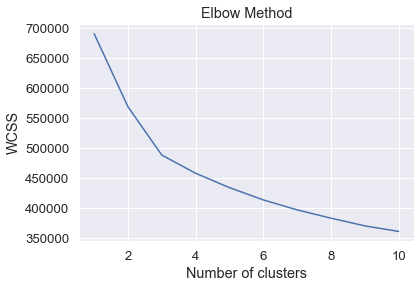

In [16]:
y=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(dataKmeansSs)
    y.append(kmeans.inertia_)
plt.plot(range(1, 11), y)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

standard scaler a donnée le même resultat que les données non centré reduites on passe à tester le RobustScaler

#### C - Donnée centre réduites avec RobustScaler

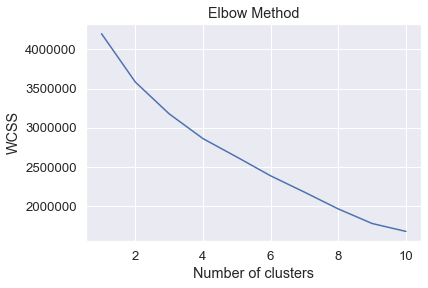

In [17]:
y=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(dataKmeansRs)
    y.append(kmeans.inertia_)
plt.plot(range(1, 11), y)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

on remarque que le courbe descent progressivement de maniére qu'il ny'as pas de cassure bien visible donc dans notre clustering on ne vas pas utliser les donnée centré reduites avec Robust Scaler

#### D - Donnée centre réduites avec MinMaxScaler

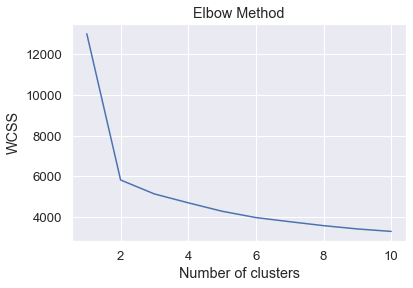

In [18]:
y=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(dataKmeansMms)
    y.append(kmeans.inertia_)
plt.plot(range(1, 11), y)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

on remarque que la cassure est bien visible au niveau du nombre de cluster 2 

#### F - Prise de  décision 

durant notre clustering on va utiliser les données centré reduites avec StandardScaler qui on presque donnée les mêmes resultats que les données non centrés reduites et aussi on va utiliser les donnée centrés reduites avec MinMaxScaler.
on va considerer 2 cluster dans notre analyse et on choisirera aprés les données qui on donné le meilleur résultat

### 2 - Clustering

#### A - Donnée centre réduites avec StandardScaler

Dans cette partie on va applique le K-Means on considerons 2 clusters avec les données centrés reduites avec StandardScaler et MinMaxScaler

In [19]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
predict = kmeans.fit(dataKmeansSs)

In [20]:
dataComp = data.iloc[1:,:]

In [21]:
dataComp["Kmeans"]=predict.labels_

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
pd.crosstab(dataComp["Y"],predict.labels_)

col_0,0,1
Y,,
0,19743,3621
1,5655,981


##### Conclusion :
D'aprés le crosstab généré aprés l'application du K-Means on remarque que le clustering n'est pas fiable puisque le cluster 0 contient les eux type de clients (ceux qui payeront et ce qui ne payeront pas )

#### B - Donnée centre réduites avec MinMaxScaler

In [23]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
predict = kmeans.fit(dataKmeansMms)

In [24]:
dataComp1 = data.iloc[1:,:]
dataComp1["KmeansMms"]=predict.labels_

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
pd.crosstab(dataComp1["Y"],predict.labels_)

col_0,0,1
Y,,
0,9015,14349
1,2873,3763


##### Conclusion : 
On remarque que le clustering avec les données centré réduites avec MinMaxScaler ont données les mêmes resultats que StandardScaler et donc on peut déduire que :
- Cluster 1 : Les clients qui ont payé leurs dettes avant ou dans le delai ( bon  clients )
- Cluster 0 : Les clients qui n'ont payé leurs dettes ou ont payés avec beaucoup de retard (mauvais client)

#### 3 - Clustering avec CAH

In [ ]:
Z = linkage(dataKmeansMms,'ward')
plt.figure(figsize=(12, 10))
plt.title('Classification Hiérarchique Ascendante', fontsize=20)
d = dendrogram(Z)
plt.show()

selon le dendogramme affiche ci-dessus avec l'algorithme non supervisé CAH et en utilisant le type de distance ward on remarque la presence de deux partitions  ( tres grande valeur intraclasses et une faible valeur interclasses ) d'ou on va proceder avec deux clusters : le cluster en vert , le cluster en rouge . 

In [ ]:
clusters = fcluster(Z,criterion='distance', t=5)
pd.crosstab(data1["Y"],clusters)

# IV - Methodes supérvisé

### 1 - Application de Decision Tree

#### a - Standard Scaler

In [29]:
data2 = data.iloc[1:,1:]
X_DT_ss = pd.DataFrame(dataKmeansSs).iloc[:,:]
Y_DT_ss =list(data2["Y"])

In [30]:
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(X_DT_ss, Y_DT_ss, random_state=0)


In [31]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_ss,y_train_ss)

In [32]:
y_pred_ss = clf.predict(X_test_ss)

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test_ss, y_pred_ss))

Accuracy: 0.7281333333333333


In [34]:
print(confusion_matrix(y_test_ss, y_pred_ss))

[[4789 1079]
 [ 960  672]]


vrai positif : 4769  , vrai negatif : 676
faux positif : 1072  , faux negatif : 956

pour 5868 peronnes qui ne vont pas payer le mois d'octobre 4769 ont etaient predit correctement alors que 1072 ont donnés une fausse prediction . 

pour 1632 peronnes qui  vont pas payer le mois d'octobre 676 ont etaient predit correctement alors que 956 ont donnés une fausse prediction . 

In [35]:
print(classification_report(y_test_ss, y_pred_ss))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      5868
           1       0.38      0.41      0.40      1632

    accuracy                           0.73      7500
   macro avg       0.61      0.61      0.61      7500
weighted avg       0.74      0.73      0.73      7500



l'application de randomForest avec le type de scalling (standard scaler ) a donnée une performence plus au moins bonne 0.73 , concernant les precisions on remarque une tres bonne prediction pour les personnes qui ne vont payer pour le mois d'octobre (0.83) , par contre il y a une baisse de precision pour les personnes qui vont payer pour le mois d'octobre 0.39 (a ameliorer ) .

#### b - Robust Scaler

In [36]:
X_DT_rs = dataKmeansRs
Y_DT_rs =list(data2["Y"])

In [37]:
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_DT_rs, Y_DT_rs, random_state=0)

In [38]:
clf_rs = DecisionTreeClassifier()
clf_rs = clf.fit(X_train_rs,y_train_rs)

In [39]:
y_pred_rs = clf.predict(X_test_rs)

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test_rs, y_pred_rs))

Accuracy: 0.7313333333333333


In [41]:
print(confusion_matrix(y_test_rs, y_pred_rs))

[[4796 1072]
 [ 943  689]]


In [42]:
print(classification_report(y_test_rs, y_pred_rs))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5868
           1       0.39      0.42      0.41      1632

    accuracy                           0.73      7500
   macro avg       0.61      0.62      0.62      7500
weighted avg       0.74      0.73      0.73      7500



#### c - MinMax Scaler

In [43]:
X_DT_mms = dataKmeansMms
Y_DT_mms =list(data2["Y"])

In [44]:
X_train_mms, X_test_mms, y_train_mms, y_test_mms = train_test_split(X_DT_mms, Y_DT_mms, random_state=0)

In [45]:
clf_mms= DecisionTreeClassifier()
clf_mms= clf.fit(X_train_mms,y_train_mms)

In [46]:
y_pred_mms = clf.predict(X_test_mms)

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test_mms, y_pred_mms))

Accuracy: 0.7325333333333334


In [48]:
print(confusion_matrix(y_test_mms, y_pred_mms))

[[4807 1061]
 [ 945  687]]


In [49]:
print(classification_report(y_test_mms, y_pred_mms))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5868
           1       0.39      0.42      0.41      1632

    accuracy                           0.73      7500
   macro avg       0.61      0.62      0.62      7500
weighted avg       0.74      0.73      0.74      7500



### 2 - Application de KNN

#### a - Standard Scaler

Text(0, 0.5, 'Erreur')

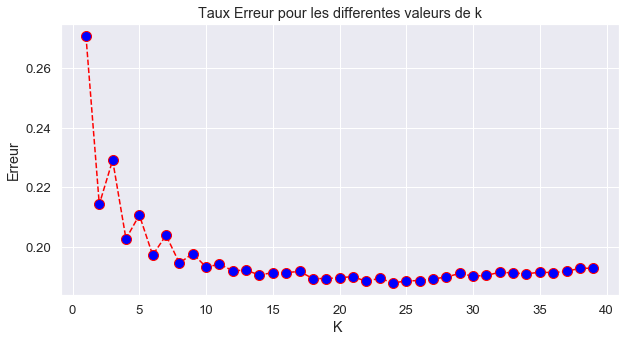

In [50]:

error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train_ss, y_train_ss)
    pred_i = knn_model.predict(X_test_ss)
    error.append(np.mean(pred_i != y_test_ss))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

le nombre de voisin ideale pour ces données est 24 puisq'il le une erreur minimale (0.05)

In [51]:
knn_ss = KNeighborsClassifier(24)
knn_model_ss = knn_ss.fit(X_train_ss, y_train_ss)
y_pred_knn_ss= knn_model_ss.predict(X_test_ss)

In [52]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(knn_ss.score(X_train_ss, y_train_ss)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(knn_ss.score(X_test_ss, y_test_ss)))

Accuracy of Random Forest classifier on training set: 0.82
Accuracy of Random Forest classifier on test set: 0.81


In [53]:
print(confusion_matrix(y_test_ss, y_pred_knn_ss))

[[5623  245]
 [1164  468]]


In [54]:
print(classification_report(y_test_ss, y_pred_knn_ss))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5868
           1       0.66      0.29      0.40      1632

    accuracy                           0.81      7500
   macro avg       0.74      0.62      0.64      7500
weighted avg       0.79      0.81      0.78      7500



#### b - Robust Scaler

Text(0, 0.5, 'Erreur')

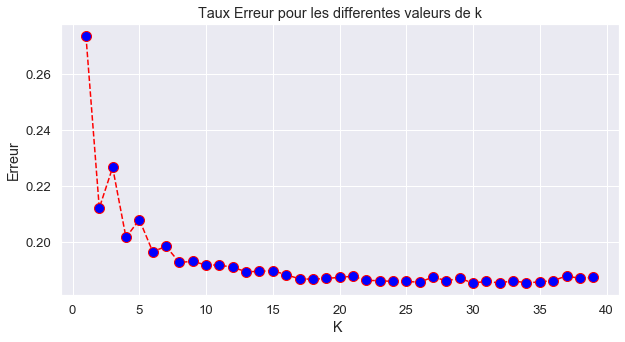

In [55]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train_rs, y_train_rs)
    pred_i = knn_model.predict(X_test_rs)
    error.append(np.mean(pred_i != y_test_rs))
plt.figure(figsize=(10, 5))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [56]:
knn_rs = KNeighborsClassifier(24)
knn_model_rs = knn_rs.fit(X_train_rs, y_train_rs)
y_pred_knn_rs= knn_model_rs.predict(X_test_rs)

In [57]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(knn_rs.score(X_train_rs, y_train_rs)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(knn_rs.score(X_test_rs, y_test_rs)))

Accuracy of Random Forest classifier on training set: 0.82
Accuracy of Random Forest classifier on test set: 0.81


In [58]:
print(classification_report(y_test_rs, y_pred_knn_rs))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5868
           1       0.66      0.30      0.42      1632

    accuracy                           0.81      7500
   macro avg       0.75      0.63      0.65      7500
weighted avg       0.79      0.81      0.79      7500



#### c - MinMax Scaler

Text(0, 0.5, 'Erreur')

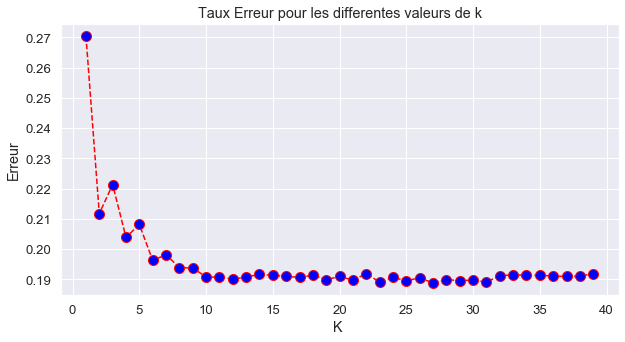

In [59]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train_mms, y_train_mms)
    pred_i = knn_model.predict(X_test_mms)
    error.append(np.mean(pred_i != y_test_mms))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [60]:
knn_mms = KNeighborsClassifier(24)
knn_model_mms = knn_mms.fit(X_train_mms, y_train_mms)
y_pred_knn_mms= knn_model_mms.predict(X_test_mms)

In [61]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(knn_mms.score(X_train_mms, y_train_mms)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(knn_mms.score(X_test_mms, y_test_mms)))

Accuracy of Random Forest classifier on training set: 0.82
Accuracy of Random Forest classifier on test set: 0.81


In [62]:
print(classification_report(y_test_mms, y_pred_knn_mms))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5868
           1       0.64      0.28      0.39      1632

    accuracy                           0.81      7500
   macro avg       0.73      0.62      0.64      7500
weighted avg       0.79      0.81      0.78      7500



In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_DT.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [ ]:
graph.write_png('mytree.png')

#### 3 - Support Vector machine

on a choisi d'utliser les donnée centré reduite avec MinMax Scaler puisque il donne toujours des résultats meilleurs

In [63]:
model_svm=svm.SVC(kernel='linear',gamma='scale',probability=True).fit(X_train_mms,y_train_mms)
y_pred_svm=model_svm.predict(X_test_mms)

In [64]:
print(classification_report(y_test_mms, y_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      5868
           1       0.73      0.24      0.36      1632

    accuracy                           0.82      7500
   macro avg       0.78      0.61      0.63      7500
weighted avg       0.80      0.82      0.78      7500



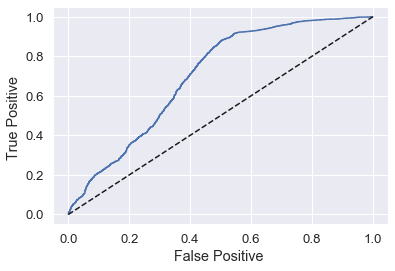

In [65]:
proba_svm  = model_svm.predict_proba(X_test_mms)
preds_svm  = proba_svm[:,0]
fp5r, tp5r, threshold = metrics.roc_curve(y_test_mms, preds_svm,pos_label=0)
plt.plot(fp5r,tp5r)
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel('True Positive ')
plt.xlabel('False Positive ')
plt.show()

#### 4 - Linear Regression

In [66]:
modele_regression_logistique = linear_model. LogisticRegression ()
model_regression= modele_regression_logistique.fit(X_train_mms, y_train_mms)
y_pred_reg=model_regression.predict(X_test_mms)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [67]:
print(classification_report(y_test_mms, y_pred_reg))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      5868
           1       0.74      0.22      0.33      1632

    accuracy                           0.81      7500
   macro avg       0.78      0.60      0.61      7500
weighted avg       0.80      0.81      0.77      7500



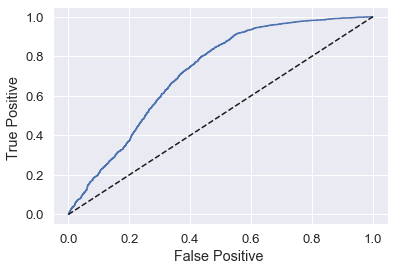

In [68]:
proba_reg  = model_regression.predict_proba(X_test_mms)
preds_Reg  = proba_reg[:,0]
fp4r, tp4r, threshold = metrics.roc_curve(y_test_mms, preds_Reg, pos_label=0)
plt.plot(fp4r,tp4r)
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel('True Positive ')
plt.xlabel('False Positive ')
plt.show()

# Dashboarding

In [69]:
data2 = data.iloc[1:,1:]

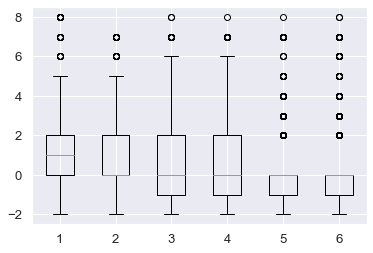

In [70]:
dataforboxplot1 = [data2["X6"][data2["Y"]==1],data2["X7"][data2["Y"]==1],
                 data2["X8"][data2["Y"]==1],data2["X9"][data2["Y"]==1],
                 data2["X10"][data2["Y"]==1],data2["X11"][data2["Y"]==1]]
plt.boxplot(dataforboxplot1);

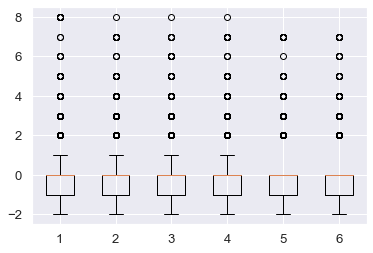

In [71]:
dataforboxplot0 = [data2["X6"][data2["Y"]==0],data2["X7"][data2["Y"]==0],
                 data2["X8"][data2["Y"]==0],data2["X9"][data2["Y"]==0],
                 data2["X10"][data2["Y"]==0],data2["X11"][data2["Y"]==0]]
plt.boxplot(dataforboxplot0);

boxplot cluster 0

In [72]:
dataplot = [ go.Box(y=dataforboxplot1[0]),
        go.Box(y=dataforboxplot1[1]),
        go.Box(y=dataforboxplot1[2]),
        go.Box(y=dataforboxplot1[3]),
        go.Box(y=dataforboxplot1[4]),
        go.Box(y=dataforboxplot1[5])
       ]
dataplot2 = [ go.Box(y=dataforboxplot0[0]),
        go.Box(y=dataforboxplot0[1]),
        go.Box(y=dataforboxplot0[2]),
        go.Box(y=dataforboxplot0[3]),
        go.Box(y=dataforboxplot0[4]),
        go.Box(y=dataforboxplot0[5])
       ]
dataplot_3 = [go.Bar(x= ["percent_pos", "percent_neg", "percent_null"] ,
                    y = [percent_pos, percent_neg, percent_null]
                    
                    )]
#barplotGenderPay = px.bar(data2,x="X2",y="X1",color="Y",barmode="group")  
layout = go.Layout(title="Etat de paiment",
                  xaxis={"title":"Etat de paiment pour le cluster 1"},
                  yaxis=dict(title="la variable y"))
layout2 = go.Layout(title="Etat de paiment",
                  xaxis={"title":"Etat de paiment pour le cluster 0"},
                  yaxis=dict(title="la variable y"))
layout3 = go.Layout(title="Etat de paiment par sexe",
                  xaxis={"title":"Sexe"},
                  yaxis=dict(title="Count"))




layout_3 = go.Layout(title="Etat de paiment pour le mois de septembre",
                  xaxis={"title":"Etat de paiment"},
                  yaxis=dict(title="pourcentage"))

fig = go.Figure(data = dataplot, layout=layout)
fig2 = go.Figure(data = dataplot2, layout=layout2)
fig_3 = go.Figure(data = dataplot_3, layout=layout_3)
#fig3= barplotGenderPay




In [529]:
trace1 = go.Bar(
    x=data2["X2"][data2["Y"]==0],
    name='Will pay'
)
trace2 = go.Bar(
    x=data2["X2"][data2["Y"]==1],
    name='Will not pay'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig5 = go.Figure(data=data, layout=layout)


In [530]:
app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])
navbar = dbc.NavbarSimple(
    children=[
        dbc.NavItem(dbc.NavLink("Some Boxplotes", href="")),
    ],
    brand="Dashboard by Mustapha & Dhia",
    brand_href="#",
    color="primary",
    dark=True,
)
boxplot =  dcc.Graph(
        id='example-graph',
        figure=fig
    )
boxplot2 =  dcc.Graph(
        id='example-graph1',
        figure=fig2
    )
barplot=dcc.Graph(
        id="barplotGender",
        figure=fig5
)

app.layout = html.Div(children=[
    html.Div(navbar),
    html.Div(boxplot),
    html.Div(boxplot2),
    html.Div(barplot)
])

In [531]:
y1=range(1,len(data2["X2"][data2["Y"]==0]))
y1

range(1, 23364)

In [532]:
data2

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Dashboard prediction

In [73]:
external_stylesheets = [
    'https://codepen.io/chriddyp/pen/bWLwgP.css',
    {
        'href': 'https://stackpath.bootstrapcdn.com/bootstrap/4.1.3/css/bootstrap.min.css',
        'rel': 'stylesheet',
        'integrity': 'sha384-MCw98/SFnGE8fJT3GXwEOngsV7Zt27NXFoaoApmYm81iuXoPkFOJwJ8ERdknLPMO',
        'crossorigin': 'anonymous'
    }
]
app = dash.Dash(external_stylesheets=external_stylesheets)

In [74]:
app.title="Prediction and Dashboard Web App"

In [75]:

Tab1 = dcc.Tab(label='Prediction', children=[
     html.Div(     style = {
                "position": "relative",
                  "top": "50px",
                 'left' : '-600px'
     }   ,
         children =
     [
         html.Label("Gender"),
         html.Br(),
         dcc.Dropdown(
            id='input2',
            options=[
                {'label': 'Male', 'value': '1'},
                {'label': 'Female', 'value': '2'},
            ],
            style={"width" : "300px"},
        ),
         html.Label("Education"),
         html.Br(),
         dcc.Dropdown(
            id='input3',
            options=[
                {'label': 'graduate school', 'value': '1'},
                {'label': 'university', 'value': '2'},
                {'label': 'high school', 'value': '3'},
                {'label': 'others', 'value': '4'}
            ],
            style={"width" : "300px"},
        ),
         html.Label("Marital status"),
         html.Br(),         
        dcc.Dropdown(
            id='input4',
            options=[
                {'label': 'married', 'value': '1'},
                {'label': 'single', 'value': '2'},
                {'label': 'others', 'value': '3'}
            ],
            style={"width" : "300px"},
        ),
         html.Label("the repayment status in September"),
         html.Br(),  
         dcc.Dropdown(
            id='input6',
            options=[
                {'label': 'Pay Duly', 'value': '-1'},
                {'label': 'Pay', 'value': '0'},
                {'label': 'payment delay for 1 month', 'value': '1'},
                {'label': 'payment delay for 2 month', 'value': '2'},
                {'label': 'payment delay for 3 month', 'value': '3'},
                {'label': 'payment delay for 4 month', 'value': '4'},
                {'label': 'payment delay for 5 month', 'value': '5'},
                {'label': 'payment delay for 6 month', 'value': '6'},
                {'label': 'payment delay for 7 month', 'value': '7'},
                {'label': 'payment delay for 8 month', 'value': '8'},
                {'label': 'payment delay for 9 month', 'value': '9'}
            ],
            style={"width" : "300px"},
        ),
         html.Label("the repayment status in August"),
         html.Br(),
         dcc.Dropdown(
            id='input7',
            options=[
                {'label': 'Pay Duly', 'value': '-1'},
                {'label': 'Pay', 'value': '0'},
                {'label': 'payment delay for 1 month', 'value': '1'},
                {'label': 'payment delay for 2 month', 'value': '2'},
                {'label': 'payment delay for 3 month', 'value': '3'},
                {'label': 'payment delay for 4 month', 'value': '4'},
                {'label': 'payment delay for 5 month', 'value': '5'},
                {'label': 'payment delay for 6 month', 'value': '6'},
                {'label': 'payment delay for 7 month', 'value': '7'},
                {'label': 'payment delay for 8 month', 'value': '8'},
                {'label': 'payment delay for 9 month', 'value': '9'}
            ],
            style={"width" : "300px"},
        ),
        html.Label("the repayment status in July"),
         html.Br(),
         dcc.Dropdown(
            id='input8',
            options=[
                {'label': 'Pay Duly', 'value': '-1'},
                {'label': 'Pay', 'value': '0'},
                {'label': 'payment delay for 1 month', 'value': '1'},
                {'label': 'payment delay for 2 month', 'value': '2'},
                {'label': 'payment delay for 3 month', 'value': '3'},
                {'label': 'payment delay for 4 month', 'value': '4'},
                {'label': 'payment delay for 5 month', 'value': '5'},
                {'label': 'payment delay for 6 month', 'value': '6'},
                {'label': 'payment delay for 7 month', 'value': '7'},
                {'label': 'payment delay for 8 month', 'value': '8'},
                {'label': 'payment delay for 9 month', 'value': '9'}
            ],
            style={"width" : "300px"},
        ),
        html.Label("the repayment status in June"),
         html.Br(),
        dcc.Dropdown(
            id='input9',
            options=[
                {'label': 'Pay Duly', 'value': '-1'},
                {'label': 'Pay', 'value': '0'},
                {'label': 'payment delay for 1 month', 'value': '1'},
                {'label': 'payment delay for 2 month', 'value': '2'},
                {'label': 'payment delay for 3 month', 'value': '3'},
                {'label': 'payment delay for 4 month', 'value': '4'},
                {'label': 'payment delay for 5 month', 'value': '5'},
                {'label': 'payment delay for 6 month', 'value': '6'},
                {'label': 'payment delay for 7 month', 'value': '7'},
                {'label': 'payment delay for 8 month', 'value': '8'},
                {'label': 'payment delay for 9 month', 'value': '9'}
            ],
            style={"width" : "300px"},
        ),
        html.Label("the repayment status in May"),
         html.Br(),
        dcc.Dropdown(
            id='input10',
            options=[
                {'label': 'Pay Duly', 'value': '-1'},
                {'label': 'Pay', 'value': '0'},
                {'label': 'payment delay for 1 month', 'value': '1'},
                {'label': 'payment delay for 2 month', 'value': '2'},
                {'label': 'payment delay for 3 month', 'value': '3'},
                {'label': 'payment delay for 4 month', 'value': '4'},
                {'label': 'payment delay for 5 month', 'value': '5'},
                {'label': 'payment delay for 6 month', 'value': '6'},
                {'label': 'payment delay for 7 month', 'value': '7'},
                {'label': 'payment delay for 8 month', 'value': '8'},
                {'label': 'payment delay for 9 month', 'value': '9'}
            ],
            style={"width" : "300px"},
        ),
        html.Label("the repayment status in April"),
         html.Br(),
        dcc.Dropdown(
            id='input11',
            options=[
                {'label': 'Pay Duly', 'value': '-1'},
                {'label': 'Pay', 'value': '0'},
                {'label': 'payment delay for 1 month', 'value': '1'},
                {'label': 'payment delay for 2 month', 'value': '2'},
                {'label': 'payment delay for 3 month', 'value': '3'},
                {'label': 'payment delay for 4 month', 'value': '4'},
                {'label': 'payment delay for 5 month', 'value': '5'},
                {'label': 'payment delay for 6 month', 'value': '6'},
                {'label': 'payment delay for 7 month', 'value': '7'},
                {'label': 'payment delay for 8 month', 'value': '8'},
                {'label': 'payment delay for 9 month', 'value': '9'}
            ],
            style={"width" : "300px"},
        ),
        

         
     ]),
##############################################################################################################################################   
     html.Div(style={
                  "position": "relative",
                  "left": "-100px",
                  "top": "-450px",
                  
                  
                  },children =
     [
         html.Label("Amount of the given credit : ",style={'margin-right' : '167px'}),
         html.Label("Age : ",style={'margin-right' : '257px'}),
         html.Label("Amount of bill statement in September : "),
         html.Br(),
         dcc.Input(
            id="input1", style={'margin-right' : '35px' , 'width':'250px'} ,
            placeholder="Amount of the given credit",
        ),
         
         dcc.Input(
            id="input5", style={'margin-right' : '35px','width' : '250px'} ,
            placeholder="Age",),       
        dcc.Input(
            id="input12", style={'margin-right' : '35px','width' : '250px'} ,
            placeholder="amount of bill statement in September",
        ),
         html.Br(),
         html.Br(),
         html.Label("Amount of bill statement in August : ",style={'margin-right' : '127px'}),
         html.Label("Amount of bill statement in july   : ",style={'margin-right' : '142px'}),
         html.Label("Amount of bill statement in June   : "),
         html.Br(),
        dcc.Input(
            id="input13", style={'margin-right' : '35px' , 'width':'250px'} ,
            placeholder="Amount of bill statement in August"),
         dcc.Input(
            id="input14", style={'margin-right' : '35px' , 'width':'250px'} ,
            placeholder="Amount of bill statement in july"),
        dcc.Input(
            id="input15", style={'margin-right' : '35px' , 'width':'250px'} ,
            placeholder="Amount of bill statement in June"),
##############################################################################################################################################   
          html.Br(),  
          html.Br(),
        html.Label("Amount of bill statement in May     : ",style={'margin-right' : '142px'}),
        html.Label("Amount of bill statement in April   : ",style={'margin-right' : '132px'}),
        html.Label("Amount paid in September   : "),
         html.Br(),
        dcc.Input(
            id="input16", style={'margin-right' : '35px' , 'width':'250px'} ,
            placeholder="Amount of bill statement in May"),
         dcc.Input(
            id="input17", style={'margin-right' : '35px' , 'width':'250px'} ,
            placeholder="Amount of bill statement in April"),
        dcc.Input(
            id="input18", style={'margin-right' : '35px' , 'width':'250px'} ,
            placeholder="amount paid in September"),
         
##############################################################################################################################################
        html.Br(),
        html.Br(),
        html.Label("Amount paid in August     : ",style={'margin-right' : '182px'}),
        html.Label("Amount paid in july   : ",style={'margin-right' : '192px'}),
        html.Label("amount paid in June   : "),
         html.Br(),
         dcc.Input(
            id="input19", style={'margin-right' : '35px' , 'width':'250px'} ,
            placeholder="amount paid in August"),
         dcc.Input(
            id="input20", style={'margin-right' : '35px' , 'width':'250px'} ,
            placeholder="amount paid in july"),
        dcc.Input(
            id="input21", style={'margin-right' : '35px' , 'width':'250px'} ,
            placeholder="amount paid in June"),
##############################################################################################################################################
        html.Br(),
        html.Br(),
        html.Label("Amount paid in May     : ",style={'margin-right' : '192px'}),
        html.Label("Amount paid in july   : ",style={'margin-right' : '192px'}),
        html.Br(),
        dcc.Input(
            id="input22", style={'margin-right' : '35px' , 'width':'250px'} ,
            placeholder="amount paid in May"),
         dcc.Input(
            id="input23", style={'margin-right' : '35px' , 'width':'250px'} ,
            placeholder="amount paid in April"),
     ]),
    '''
    html.Div(id='Output'  ,      style={
                  "position": "relative",
                  "left": "600px",
                  "top": "-400px",
                  'font-size': '60px'
                  
                  },children=[
                ]
    )
    '''
])

In [76]:
data2.head(1)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1


In [77]:
inputs = []
for i in range(1,24):
        inputs.append(dcc.Input(
            id='input'+str(i)
            ,style={'display':'none'}
        ))
inputs

[Input(id='input1', style={'display': 'none'}),
 Input(id='input2', style={'display': 'none'}),
 Input(id='input3', style={'display': 'none'}),
 Input(id='input4', style={'display': 'none'}),
 Input(id='input5', style={'display': 'none'}),
 Input(id='input6', style={'display': 'none'}),
 Input(id='input7', style={'display': 'none'}),
 Input(id='input8', style={'display': 'none'}),
 Input(id='input9', style={'display': 'none'}),
 Input(id='input10', style={'display': 'none'}),
 Input(id='input11', style={'display': 'none'}),
 Input(id='input12', style={'display': 'none'}),
 Input(id='input13', style={'display': 'none'}),
 Input(id='input14', style={'display': 'none'}),
 Input(id='input15', style={'display': 'none'}),
 Input(id='input16', style={'display': 'none'}),
 Input(id='input17', style={'display': 'none'}),
 Input(id='input18', style={'display': 'none'}),
 Input(id='input19', style={'display': 'none'}),
 Input(id='input20', style={'display': 'none'}),
 Input(id='input21', style={'

In [78]:
############### Age en fonction du credit #####################
data_Age_Credit = [ go.Scatter(x=data2["X5"],y=data2["X1"],mode='markers')
        ]
layout_Age_Credit = go.Layout(title="Age en fonction du crédit",
                  xaxis={"title":"Age"},
                  yaxis={"title":"Credit"})
fig_Age_Credit = go.Figure(data = data_Age_Credit, layout=layout_Age_Credit)
############### Etat de payement pout chaque type #####################
dataplot_1 = [ go.Box(y=dataforboxplot1[0]),
        go.Box(y=dataforboxplot1[1]),
        go.Box(y=dataforboxplot1[2]),
        go.Box(y=dataforboxplot1[3]),
        go.Box(y=dataforboxplot1[4]),
        go.Box(y=dataforboxplot1[5])
       ]
dataplot_0 = [ go.Box(y=dataforboxplot0[0]),
        go.Box(y=dataforboxplot0[1]),
        go.Box(y=dataforboxplot0[2]),
        go.Box(y=dataforboxplot0[3]),
        go.Box(y=dataforboxplot0[4]),
        go.Box(y=dataforboxplot0[5])
       ] 
layout_1 = go.Layout(title="Etat de paiment",
                  xaxis={"title":"Etat de paiment pour le cluster 1"},
                  yaxis=dict(title="la variable y"))
layout_0 = go.Layout(title="Etat de paiment",
                  xaxis={"title":"Etat de paiment pour le cluster 0"},
                  yaxis=dict(title="la variable y"))
fig_0 = go.Figure(data = dataplot_0, layout=layout_0)
fig_1 = go.Figure(data = dataplot_1, layout=layout_1)

In [79]:
Tab2 = dcc.Tab(label='Dashboards' , children=[
    
        dcc.Graph(
        id='AgeCredit',
        figure=fig_Age_Credit,
        style={'margin-left': '-42%' , 'width' : '100%' }
        ),
   
        dcc.Graph(
        id='Payement0',
        figure=fig_0,
        style={'margin-left': '-42%' , 'width' : '100%' }
        ),
    
        dcc.Graph(
        id='Payement1',
        figure=fig_1 ,
        style={'margin-left': '-42%' , 'width' : '100%'}
        ),
    
        dcc.Graph(
        id='Payement_september2',
        figure=fig_3,
        style={'margin-left': '-42%' , 'width' : '100%'}
        )
])

In [80]:
colors = {
    'background': '#5CDB95',
    'text': '#05386B'
}

app.layout = html.Div( children=[
    html.Div(style={'backgroundColor': colors['background']} ,children = [
    html.H1(
        children='Application Web Bank of Asia',
        style={
            'textAlign': 'center',
            'color': colors['text'],
        }
    ),

    html.Div(children='For a good prediction and awesome dashboards', style={
        'textAlign': 'center',
        'color': colors['text']
    })]),
    
    html.Div(style={
                  "position": "relative",
                  "left": "650px",
                  "top" : "120px"
                  },
        id="log119",
        children=[
        html.Img(src=app.get_asset_url('login-icon.png'),style={'width':'100px','height':'100px','margin-left':"100px"}),
        html.Br(),
        html.Br(),
        dcc.Input(
            id="auth",
            style = {'width':"300px"},
            placeholder = "User Name"
        ),
        html.Br(),
        html.Br(),
         dcc.Input(
            id="pass",
            style = {'width':"300px"},
            placeholder = "Password",
            type = "password"
        ),
        html.Br(),
        html.Br(),
        dbc.Button("Se connecter", id="example-button", className="mr-2",style={"margin-left":'100px'}),
        html.Span(id="test2", style={"vertical-align": "middle"}),
    ]),
    html.Div(
        id='Output17',
        children = inputs,
        style={ "position": "relative",
                  "left": "600px",
                  "top": "-250px",}
    ),
    
    #dcc.Tabs([
     #   Tab1,
      #  Tab2,
    #])

])

In [81]:

@app.callback(
    Output("log119", "children"), [Input("example-button", "n_clicks"),Input("auth", "value")
                                   ,Input("pass", "value")]
)
def on_button_click(n,auth,pasw):
    if(auth=="Mustapha" and pasw=="123"):
        if(n!=None):
            a = dcc.Tabs(style={'margin-top':'-120px','margin-left':'-700px','width':'100%'},children=[
                
                   Tab1,
                Tab2,])
    return a


In [82]:
@app.callback(
    Output('Output17', 'children'),
   [Input('input1', 'value'),Input('input2', 'value'),Input('input3', 'value'),
    Input('input4', 'value'),Input('input5', 'value'),Input('input6', 'value'),
    Input('input7', 'value'),Input('input8', 'value'),Input('input9', 'value'),
    Input('input10', 'value'),Input('input11', 'value'),Input('input12', 'value'),
    Input('input13', 'value'),Input('input14', 'value'),Input('input15', 'value'),
    Input('input16', 'value'),Input('input17', 'value'),Input('input18', 'value'),
    Input('input19', 'value'),Input('input20', 'value'),Input('input21', 'value'),
    Input('input22', 'value'),Input('input23', 'value')
  ]
)
def pass_onmodel(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23):
    if(x1!=None and x1!=None and x2!=None  and x3!=None and x4!=None and x5!=None and x6!=None and x7!=None and x8!=None and x9!=None and x10!=None 
       and x11!=None and x12!=None and x13!=None and x14!=None and x15!=None and x16!=None and x17!=None  and x18!=None 
      and x19!=None and x20!=None and x21!=None and x22!=None and  x23!=None) :
        new_customer = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23]
        new_cus = [int(i) for i in new_customer]
        new = [new_cus]
        new = mms.fit_transform(new)
        y_pred = knn_model_mms.predict(new)
        if(y_pred[0]==0):
            ch = "Bad Customer he won't pay"
            color = 'Tomato'
        else :
            ch = "Good Customer he will pay"
            color = 'MediumSeaGreen'
    return html.P(ch,style = {'color':color,'font-size':'30px','left-margin':"-500%"})


In [ ]:
app.run_server()